In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Entrega Acotamiento de Distribuciones  
**El Acotamiento de Distribuciones: Fundamentos, Aplicaciones y Ejemplos**


# ¿Qué es el acotamiento de distribuciones?

El **acotamiento de distribuciones** se refiere a las características de aquellas distribuciones de probabilidad cuyos valores posibles están limitados o “acotados” dentro de un intervalo específico.  
En términos matemáticos, una distribución está acotada cuando existe un valor mínimo (cota inferior) y/o un valor máximo (cota superior) que la variable aleatoria no puede superar.



## 1. Modelado de fenómenos naturalmente limitados
Aplicación: Permite representar variables que por su naturaleza física no pueden exceder ciertos límites.
Ejemplo detallado: El modelado de concentraciones químicas en una solución.
Imagina que estamos analizando la concentración de un contaminante en muestras de agua. La concentración nunca puede ser negativa (cota inferior en 0) ni superar el 100% (cota superior en 1 o 100%).
Para modelar esto, podríamos utilizar una distribución beta, que está acotada en el intervalo [0,1]:
$$f(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)} \quad \text{para } 0 \leq x \leq 1$$
Donde $B(\alpha, \beta)$ es la función beta y $\alpha, \beta > 0$ son parámetros de forma.
Si los datos históricos sugieren que la concentración promedio es 0.05 (5%) con una varianza pequeña, podríamos ajustar parámetros como $\alpha = 2$ y $\beta = 38$, produciendo una distribución que refleja adecuadamente la realidad física del fenómeno, respetando las cotas naturales.


Text(0.5, 1.0, 'Distribución Beta para Concentraciones Químicas')

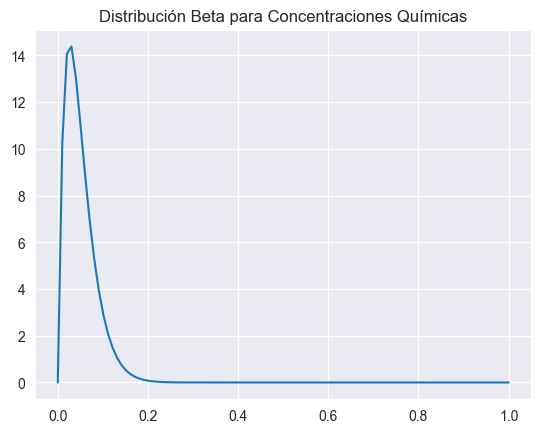

In [3]:
##Plot a beta distribution
x = np.linspace(0, 1, 100)
y = stats.beta.pdf(x, a=2, b=38)
plt.plot(x, y)
plt.title('Distribución Beta para Concentraciones Químicas')

## 2. Control de calidad y tolerancias de fabricación
Aplicación: Para establecer límites de especificación en procesos industriales.
Ejemplo detallado: Control de calidad en la fabricación de componentes automotrices.
Supongamos que fabricamos pistones para motores con un diámetro objetivo de 85.00 mm. Las especificaciones técnicas establecen que el diámetro debe estar entre 84.95 mm y 85.05 mm. Fuera de este rango, los pistones se consideran defectuosos.
Modelamos el proceso usando una distribución normal truncada, acotada por los límites de especificación:
$$f(x;\mu,\sigma,a,b) = \frac{\phi(\frac{x-\mu}{\sigma})}{\sigma\left[\Phi(\frac{b-\mu}{\sigma})-\Phi(\frac{a-\mu}{\sigma})\right]}$$
Donde:
$\phi$ es la función de densidad normal estándar
$\Phi$ es la función de distribución acumulativa normal estándar
$a = 84.95$ y $b = 85.05$ son las cotas inferior y superior
$\mu = 85.00$ es la media del proceso
$\sigma = 0.02$ es la desviación estándar del proceso
Este modelo permite calcular probabilidades cruciales, como el porcentaje de piezas conformes e implementar gráficos de control para monitorear el proceso, asegurando que la producción se mantenga dentro de las tolerancias especificadas.

*representando la situacion anterior con statsfit*

In [4]:
# Parameters for the truncated normal distribution
mu = 85.00
sigma = 0.02
a = 84.95
b = 85.05

# Function to calculate the truncated normal distribution
def truncated_normal(mu, sigma, a, b, size=1000):
    lower, upper = (a - mu) / sigma, (b - mu) / sigma
    return stats.truncnorm.rvs(lower, upper, loc=mu, scale=sigma, size=size)

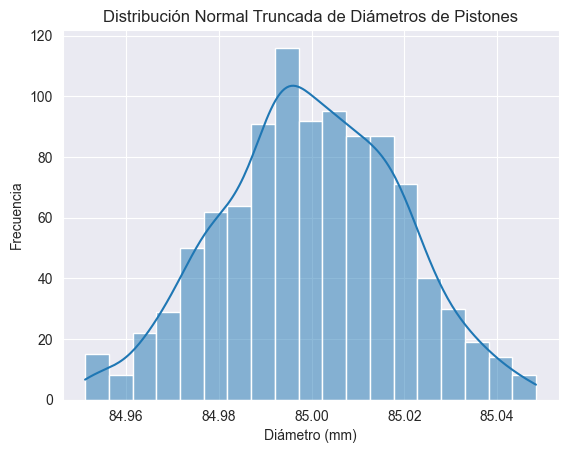

In [5]:
sample_size = 1000
piston_diameters = truncated_normal(mu, sigma, a, b, sample_size)

# Plot the distribution of piston diameters
sns.histplot(piston_diameters, kde=True)
plt.title('Distribución Normal Truncada de Diámetros de Pistones')
plt.xlabel('Diámetro (mm)')
plt.ylabel('Frecuencia')
plt.show()

## 3. Finanzas y gestión de riesgos
Aplicación: Para modelar rendimientos financieros y riesgos con límites definidos.
Ejemplo detallado: Valoración de opciones financieras.
Las opciones financieras tienen pagos (payoffs) naturalmente acotados. Por ejemplo, en una opción de compra (call option), el beneficio máximo no está limitado teóricamente, pero existe una cota inferior: el comprador no puede perder más que la prima pagada.
Consideremos una opción de compra sobre acciones de una empresa tecnológica:
Precio actual de la acción ($S_0$): 100€
Precio de ejercicio ($K$): 105€
Prima pagada: 3€
Vencimiento: 3 meses
El rendimiento está acotado inferiormente en -3€ (pérdida máxima = prima pagada). Para modelar este rendimiento, podemos utilizar distribuciones acotadas como la distribución de Pareto truncada.
La función de densidad sería:
$$f(x) =
\begin{cases}
0 & \text{si } x < -3 \\
\frac{\alpha x_m^\alpha}{x^{\alpha+1}} & \text{si } -3 \leq x < L \\
0 & \text{si } x \geq L
\end{cases}
$$
Donde $L$ es un límite teórico superior que podría establecerse para fines prácticos de modelado, $\alpha$ es el parámetro de forma y $x_m$ es el parámetro de escala.

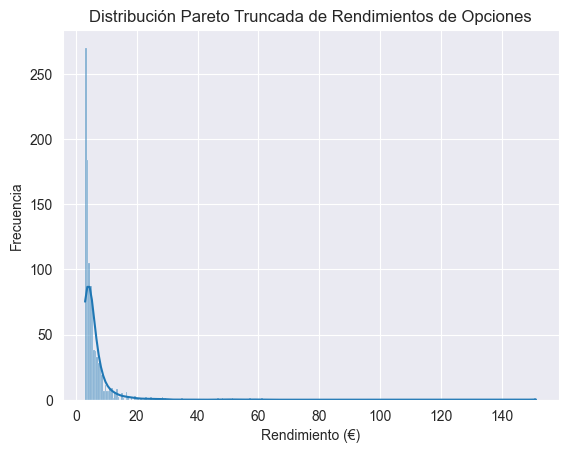

In [8]:
alpha = 2  # shape parameter
x_m = 3  # scale parameter (minimum value)
L = 50  # upper limit for practical modeling

# Function to calculate the truncated Pareto distribution
def truncated_pareto(alpha, x_m, L, size=1000):
    lower, upper = x_m, L
    return stats.pareto.rvs(alpha, scale=x_m, size=size)

# Generate a sample of option returns
sample_size = 1000
option_returns = truncated_pareto(alpha, x_m, L, sample_size)

# Plot the distribution of option returns
sns.histplot(option_returns, kde=True)
plt.title('Distribución Pareto Truncada de Rendimientos de Opciones')
plt.xlabel('Rendimiento (€)')
plt.ylabel('Frecuencia')
plt.show()

## 4. Ciencias biomédicas y ensayos clínicos
Aplicación: Para modelar variables biológicas que tienen límites naturales y para el diseño y análisis de ensayos clínicos.
Ejemplo detallado: Modelado de concentraciones plasmáticas de fármacos.
En farmacología clínica, la concentración de un medicamento en plasma sanguíneo está naturalmente acotada. No puede ser negativa (cota inferior en 0) y existe un límite superior teórico determinado por la dosis administrada y la fisiología del paciente.
Supongamos un ensayo clínico que evalúa un nuevo antihipertensivo:
Se administra una dosis de 50 mg a pacientes hipertensos
Se mide la concentración plasmática a intervalos regulares durante 24 horas
La ventana terapéutica (rango de concentraciones efectivas y seguras) está entre 5 y 15 ng/mL
Para modelar estas concentraciones, podríamos utilizar una distribución log-normal truncada:
$$f(x;\mu,\sigma,a,b) = \frac{1}{x\sigma\sqrt{2\pi}} \exp\left(-\frac{(\ln x - \mu)^2}{2\sigma^2}\right) \cdot \frac{1}{\Phi\left(\frac{\ln b - \mu}{\sigma}\right) - \Phi\left(\frac{\ln a - \mu}{\sigma}\right)}$$
Donde:
$a = 0$ (concentración mínima posible)
$b = 20$ (concentración máxima teórica para esta dosis)
$\mu$ y $\sigma$ son parámetros de la distribución
Este modelo permite:
Estimar la proporción de pacientes que mantendrán concentraciones dentro de la ventana terapéutica
Calcular el tiempo que la concentración permanece en rango terapéutico
Optimizar regímenes de dosificación para maximizar la eficacia y minimizar efectos adversos
Ajustar dosis para subpoblaciones específicas (ancianos, pacientes con insuficiencia renal, etc.)
Además, en ensayos clínicos, las escalas de evaluación de síntomas (como escalas de dolor de 0-10 o cuestionarios de calidad de vida) producen datos naturalmente acotados que requieren distribuciones estadísticas apropiadas para su análisis.

C:\Users\57321\AppData\Local\Temp\ipykernel_27476\2710060974.py:15: RuntimeWarning: divide by zero encountered in log
  lower, upper = (np.log(a) - mu) / sigma, (np.log(b) - mu) / sigma


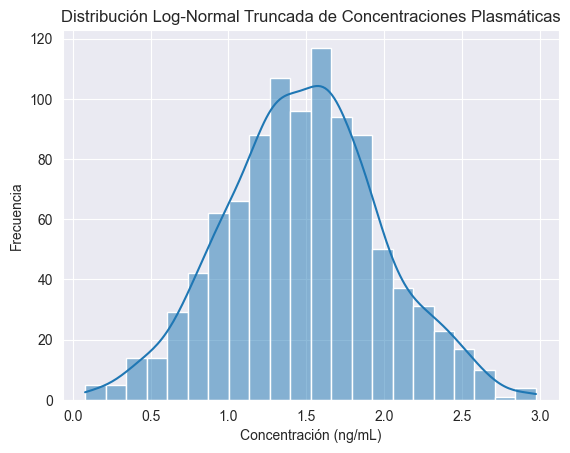

In [10]:
# Import necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters for the truncated log-normal distribution
mu = 1.5  # mean of the log-normal distribution
sigma = 0.5  # standard deviation of the log-normal distribution
a = 0  # lower bound
b = 20  # upper bound

# Function to calculate the truncated log-normal distribution
def truncated_lognormal(mu, sigma, a, b, size=1000):
    lower, upper = (np.log(a) - mu) / sigma, (np.log(b) - mu) / sigma
    return stats.truncnorm.rvs(lower, upper, loc=mu, scale=sigma, size=size)

# Generate a sample of plasma concentrations
sample_size = 1000
plasma_concentrations = truncated_lognormal(mu, sigma, a, b, sample_size)

# Plot the distribution of plasma concentrations
sns.histplot(plasma_concentrations, kde=True)
plt.title('Distribución Log-Normal Truncada de Concentraciones Plasmáticas')
plt.xlabel('Concentración (ng/mL)')
plt.ylabel('Frecuencia')
plt.show()

## 5. Ejercicio propuesto

### 5.1 Entradas conocidas

In [3]:
# Number of claims for Class A: Negative Binomial (Discrete)
num_siniestros_A = stats.nbinom(n=5, p=0.25)  # n: number of failures, p: success probability

# Number of claims for Class B: Geometric (Discrete)
num_siniestros_B = stats.geom(p=0.25)  # Geometric distribution models the number of trials until the first success

# Claim size for Class A: Exponential (Continuous, already non-negative)
tam_reclamacion_A = stats.expon(scale=40000)  # scale = mean, since mean = 1/lambda in exponential

# Claim size for Class B: Pearson Type V (Continuous)
tam_reclamacion_B = stats.invgamma(a=10, scale=2000000)  # Pearson V is an inverse gamma distribution

In [23]:
total_simulations = 1000
costo_por_ensayo = []


for i in range(total_simulations):
    costo_ensayo_i = 0
    # Number of claims for Class A
    num_claims_A = num_siniestros_A.rvs()
    # Number of claims for Class B
    num_claims_B = num_siniestros_B.rvs()
    # Claim size for Class A
    for i in range(num_claims_A):
        costo_ensayo_i += tam_reclamacion_A.rvs()
    # Claim size for Class B
    for i in range(num_claims_B):
        costo_ensayo_i += tam_reclamacion_B.rvs()
    costo_por_ensayo.append(costo_ensayo_i)


In [24]:
costo_por_ensayo = np.array(costo_por_ensayo)

<Axes: ylabel='Count'>

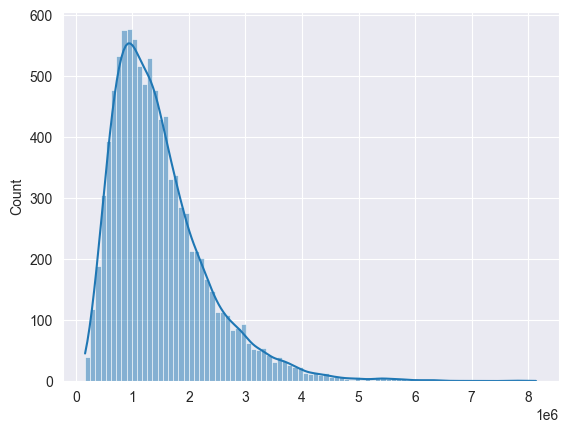

In [21]:
sns.histplot(costo_por_ensayo, kde=True)

### A simple vista se observa que la distrubucion no es simetrica. Procedemos a analizar el coeficiente de variacion

In [26]:
## Coeficiente de variación
cv = np.std(costo_por_ensayo) / np.mean(costo_por_ensayo)
cv

0.5450472314282605

## Como el coeficiente de variacion es menor a 1 se evaluara la distribucion gamma


In [31]:
# Fitting a gamma distribution to the data
alpha, loc, beta = stats.gamma.fit(costo_por_ensayo, floc=0)
alpha, loc, beta

(3.706519418123265, 0, 405992.1863473742)

## Realizamos una prueba de bondad de ajuste

In [32]:
##Goodness of fit test
stats.kstest(costo_por_ensayo, 'gamma', args=(alpha, loc, beta))

KstestResult(statistic=0.0417928089174846, pvalue=0.05909494322768394, statistic_location=1641749.7985438118, statistic_sign=1)

##

### Como el p-valor es > 0.05, no se rechaza la hipotesis nula de que la distribucion gamma se ajusta a los datos